## Final Project Submission

Please fill out:
* Student name: Elizabeth Fawcett
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL: 


## Methodology

To evaluate the King's country dataset, I have chosen to use the following steps:
- Business Understanding
- Data Understanding and Data Prep
 - Obtain Data
 - Scrub Data
 - Explore Data
- Modeling
- Interpret
- Evaluation
- Deployment of Model

This is a combination of the OSEMN method explained at:[insert link here] and the CRISP-DM method explained at:[insert line here]. I found that the OSEMN method explained the data science process, but did not provide a framework for contextualization of the model or original data; whereas, the CRISP-DM method provided the business understanding and deployment steps to handle defining the scope of a project. I found the descriptors in the CRISP-DM method for projects did not specify obtaining or cleaning the data, which is where the OSEMN method shines. Both methods have strengths and weakness; as a result, I decided to pull the details from both to enrich my project building experience and to always keep the client in mind by expanding on the steps of both methodologies.

## Business Understanding

To develop an understanding of the nature of the business of the housing market, I'm referencing my own experience apartment shopping, the things I learned about what's important to me as a consumer of housing, an article written by one of the top real estate leaders in the northeast about common seller's questions, and the information provided in the dataset. 

In my own experience, when looking for an apartment, as a home buyer, I am looking for livability and the condition of the home. Will I need to invest to ensure that the place meets my personal standard? Do the features available meet my needs? For instance, in the past, a one bedroom apartment was sufficent. However, now I'm looking to use a bedroom as an office, so I am looking for two bedroom apartments, but one bathroom is still okay. To conclude, as a consumer I look at the quality of my investment and then determine if the space meets my needs.

From a real estate perspective, some of the most frequently asked questions by a home seller include the following. What does the market look like right now? At what point in the year should I sell? How can I improve my home to sell? What price should I set? What is the actual value of my home? insert [reference] here. It seems as if a seller is trying to pinpoint where they are on the sliding scale of value for their surrounding area, and maximizing profit based on this scale.

The data provides both categorical and continuous data points that fall into a few different categories. The continuous data deals with square footage, time, and location; whereas the categorical data includes aspects of the home that cannot change, one of which is whether or not the property is waterfront, and opinions about the home. This is a nice mixture of data that buyers and sellers would be interested in. There are some data points that include information about the surrounding neighborhood to develop the type of sliding scale of home value as well as the condition of the home and included features.

## Data Understanding and Data Prep

### Obtain Data

The dataset used for this exploration is located in this repository under the filename: kc_house_data.csv.

In [259]:
# Your code here - remember to use markdown cells for comments as well!
# import data set from repository
import pandas as pd
df = pd.read_csv('kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Primary observations about the data in this king county housing data include:
- There are n/a's in the data set
- Even though most of the data is numerical, a lot of the numbers are categorical, like number of bedrooms
- There's something funky going on with the column names
- The years in yr_renovated have floats, but they need to be integers, and this is the case with the floors column as well

### Scrub Data

The following scrubbing techniques were applied to the original data:
- Manage n/a data types
- Delete duplicate rows
- Sort into categorical and continuous data
- Correct data types

### Manage n/a data types

In [260]:
# categorical nans identification
print(len(df))
df.isna().sum()

21597


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront column is missing a lot values, what percentage of the dataset do these missing values constitute? The view column is missing far less, but what percentage of the data does it represent? This data set answers how many views does the property have prior to selling, this could be useful information for the seller in changing their price point as number of views increases.

In [261]:
# how much of the data is missing?
print('% of waterfront missing data: ' + str(df['waterfront'].isna().sum() / len(df['waterfront'])))
print('% of view missing data: ' + str(df['view'].isna().sum() / len(df['view'])))
print('% of yr_renovated data: ' + str(df['yr_renovated'].isna().sum() / len(df['yr_renovated'])))

% of waterfront missing data: 0.11001527989998611
% of view missing data: 0.0029170718155299346
% of yr_renovated data: 0.17789507802009538


Since the missing waterfront and yr_renovated data is more than 10% of the dataset, I'll create a new category 'unknown'.  Since the missing view data is less than 1% of the dataset, I'll remove those rows.

In [262]:
# managing categorical nans
# fill waterfront nans with unknown
waterfront_clean = pd.DataFrame(df.loc[:,'waterfront']).fillna(value='unknown')
yr_renovated_clean = pd.DataFrame(df.loc[:,'yr_renovated']).fillna(value='unknown')
df_clean = df_clean.drop(labels='waterfront', axis=1)
df_clean = df_clean.drop(labels='yr_renovated', axis=1)
df_clean = pd.merge(df_clean, waterfront_clean, left_index=True, right_index=True)
df_clean = pd.merge(df_clean, yr_renovated_clean, left_index=True, right_index=True)
# df_clean.head()

# delete nans rows in view
df_clean = df_clean.dropna()
print(len(df_clean))
df_clean.isna().sum()

23553


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront       0
yr_renovated     0
dtype: int64

### Delete duplicate rows

In [263]:
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

duplicated rows: 1794


In [265]:
df_clean.drop_duplicates(inplace=True)
print('duplicated rows: ' + str(df_clean.duplicated().sum()))
print(len(df_clean))
df_clean.head()

duplicated rows: 0
21759


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront,yr_renovated
id,,,,,,,,,,,,,,,,,,,,
1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,unknown,0
1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,0,0
1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,unknown,0
1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,0,0
1200019,5/8/2014,647500.0,4,1.75,2060,26036,1.0,0.0,4,8,1160,900.0,1947,98166,47.4444,-122.351,2590,21891,unknown,0


### Sort into categorical and continuous data

In [266]:
categorical = df_clean.loc[:,['zipcode', 'yr_built','bedrooms', 'bathrooms', 'floors', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade']]
# categorical.head()
continuous = df_clean.loc[:, ['lat', 'long', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'date', 'sqft_living15', 'sqft_lot15']]
# continuous.head()
target = pd.DataFrame(df_clean.loc[:, 'price'])
# target.head()

### Correct data types

In [267]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21759 entries, 1000102 to 9900000190
Data columns (total 10 columns):
zipcode         21759 non-null int64
yr_built        21759 non-null int64
bedrooms        21759 non-null int64
bathrooms       21759 non-null float64
floors          21759 non-null float64
waterfront      21759 non-null object
yr_renovated    21759 non-null object
view            21759 non-null float64
condition       21759 non-null int64
grade           21759 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.8+ MB


What do the values look like in each of these categories?

In [268]:
print(categorical.zipcode.unique())
print(categorical.yr_built.unique())
print(categorical.bedrooms.unique())
print(categorical.bathrooms.unique())
print(categorical.floors.unique())
print(categorical.waterfront.unique())
print(categorical.yr_renovated.unique())
print(categorical.view.unique())
print(categorical.condition.unique())
print(categorical.grade.unique())

[98002 98166 98168 98144 98178 98108 98032 98055 98118 98122 98115 98007
 98034 98052 98042 98040 98136 98126 98146 98188 98059 98109 98116 98103
 98006 98075 98024 98155 98003 98023 98117 98177 98019 98028 98092 98022
 98070 98038 98107 98106 98065 98053 98072 98077 98133 98001 98056 98045
 98033 98011 98014 98199 98008 98031 98004 98074 98030 98027 98029 98058
 98010 98005 98198 98148 98112 98125 98105 98102 98119 98039]
[1991 1947 1952 1930 1951 1960 2005 1945 1924 1925 1902 2014 1901 2007
 1941 1998 1994 1993 1997 1995 1996 2003 1913 1907 1915 1908 1985 1918
 1921 1949 1914 1975 1978 1958 1956 1954 1959 1977 1955 1939 2013 1942
 1950 1929 2001 1928 1966 1965 2012 1920 1957 2008 1934 1983 1962 2004
 2010 1963 1940 1988 1912 1999 1968 2002 2006 2009 1976 1946 1981 1984
 1986 1987 1989 1990 1948 1979 1980 1937 1970 1927 1923 1909 1916 1943
 2000 1971 1974 1911 1961 1967 1922 1910 2011 1944 1931 1905 1936 1917
 1992 1964 1919 1973 1903 1982 1926 1972 1953 1969 2015 1932 1904 1900
 1933

The output above for zipcode, yr_built, and bedrooms look good, and as expected.
The output for bathrooms looks strange, it's a float64, but some of the values are whole numbers, change the values here to have 2 decimal places.
The output for floors is similar to bathrooms, change the values to have one decimal place.
View needs to be changed to an int64 value.
Condition and grade look good and as expected.

Since waterfront and yr_renovated are already objects, chaning their number formatting needs to happen while categorizing.
Waterfront doesn't need decimal places at all, change to an int64.
Yr_renovated doesn't need decimal places either.

In [269]:
# bathrooms update for all values to have decimal places
bathrooms_clean = pd.DataFrame(categorical.bathrooms.astype(str))
categorical = categorical.drop(labels='bathrooms', axis=1)
categorical = pd.merge(categorical, bathrooms_clean, how='outer', left_index=True, right_index=True)
new_columns = ['zipcode', 'yr_built', 'bedrooms', 'floors', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms']
categorical.columns = new_columns
print(categorical.info())
print(categorical.bathrooms.unique())
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23633 entries, 1000102 to 9900000190
Data columns (total 10 columns):
zipcode         23633 non-null int64
yr_built        23633 non-null int64
bedrooms        23633 non-null int64
floors          23633 non-null float64
waterfront      23633 non-null object
yr_renovated    23633 non-null object
view            23633 non-null float64
condition       23633 non-null int64
grade           23633 non-null int64
bathrooms       23633 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 2.0+ MB
None
['3.0' '1.75' '1.0' '2.0' '2.75' '1.5' '2.5' '2.25' '3.25' '3.5' '4.5'
 '3.75' '0.75' '4.0' '5.0' '5.25' '4.25' '7.5' '6.5' '5.5' '4.75' '6.0'
 '1.25' '8.0' '5.75' '6.75' '6.25' '0.5' '7.75']
duplicated rows: 0


In [270]:
# floors update for all values to have decimal places
floors_clean = pd.DataFrame(categorical.floors.astype(str))
categorical = categorical.drop(labels='floors', axis=1)
categorical = pd.merge(categorical, floors_clean, how='left', left_index=True, right_index=True)
new_columns = ['zipcode', 'yr_built', 'bedrooms', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms', 'floors']
categorical.columns = new_columns
print(categorical.info())
print(categorical.floors.unique())
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114317 entries, 1000102 to 9900000190
Data columns (total 10 columns):
zipcode         114317 non-null int64
yr_built        114317 non-null int64
bedrooms        114317 non-null int64
waterfront      114317 non-null object
yr_renovated    114317 non-null object
view            114317 non-null float64
condition       114317 non-null int64
grade           114317 non-null int64
bathrooms       114317 non-null object
floors          114317 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 9.6+ MB
None
['2.0' '1.0' '1.5' '3.0' '2.5' '3.5']
duplicated rows: 0


In [193]:
# waterfront update to int64 # needs to be done after conversion into categories?
waterfront_int = pd.DataFrame(categorical.waterfront.astype(int))
categorical = categorical.drop(labels='waterfront', axis=1)
categorical = pd.merge(categorical, waterfront_int, left_index=True, right_index=True)
new_columns = ['zipcode', 'yr_built', 'bedrooms', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms', 'floors', 'waterfront']
categorical.columns = new_columns
print(categorical.info())
print(categorical.waterfront.unique())

ValueError: invalid literal for int() with base 10: 'unknown'

#### Categorization time!

For each of the columns in the categorical dataframe, a change to categorical data is needed.

In [ ]:
# zipcode categories
zip_cate = pd.DataFrame(categorical.loc[:,'zipcode'].astype('category'))
categorical = categorical.drop(labels='zipcode', axis=1)
categorical = pd.merge(categorical, zip_cate, left_index=True, right_index=True)
new_columns = ['yr_built', 'bedrooms', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms', 'floors', 'waterfront', 'zipcode']
categorical.columns = new_columns
print(categorical.info())

At this point, I realized my dataset was growing, but without duplicate rows. My method of updating column information isn't working. The cell above this one wouldn't run at all and was causing kernal crashes.
The first number of rows that I have is 21597. Then after cleaning the dataset 23553. Then 1794 duplicated rows were deleted. At this point, the 21759 number of rows is still greater than the beginning number of rows in the data set. This is a problem. After updated the datatype for the bathrooms columns, my number of rows is equal to 23633, another increase. After changing the floors column, I had 114317 rows. In the next datatype update to categories for the column of data 'zipcode', the kernal dies. It is at this point, I realized that my method of updating information in the data is not working. So we begin again, with importing.
# So we begin again.
## Data Understanding and Data Prep
### Import Data

In [9]:
# Your code here - remember to use markdown cells for comments as well!
# import data set from repository
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')

df = pd.read_csv('kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [127]:
# nans identification
print(len(df))
df.isna().sum()

21597


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [128]:
# how much of the data is missing?
print('% of waterfront missing data: ' + str(df['waterfront'].isna().sum() / len(df['waterfront'])))
print('% of view missing data: ' + str(df['view'].isna().sum() / len(df['view'])))
print('% of yr_renovated data: ' + str(df['yr_renovated'].isna().sum() / len(df['yr_renovated'])))

% of waterfront missing data: 0.11001527989998611
% of view missing data: 0.0029170718155299346
% of yr_renovated data: 0.17789507802009538


In [129]:
# i realized that a potential solution was to look at the descibe method
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The following two cells will show a before and after of rewriting the nans portion of the code. I think the problem is with the type of merge that I'm doing, since the datasets are growing in length. So, I will simply and remove merging.

In [150]:
# before
# managing nans
# fill waterfront and yr_renovated nans with unknown
waterfront_clean = pd.DataFrame(df.loc[:,'waterfront']).fillna(value='unknown')
yr_renovated_clean = pd.DataFrame(df.loc[:,'yr_renovated']).fillna(value='unknown')
df_clean = df_clean.drop(labels='waterfront', axis=1)
df_clean = df_clean.drop(labels='yr_renovated', axis=1)
df_clean = pd.merge(df_clean, waterfront_clean, left_index=True, right_index=True)
df_clean = pd.merge(df_clean, yr_renovated_clean, left_index=True, right_index=True)
# df_clean.head()

# delete nans rows in view
df_clean = df_clean.dropna()
print(len(df_clean))
df_clean.isna().sum()

22608


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront       0
yr_renovated     0
dtype: int64

In [10]:
# after
# managing nans
# fill waterfront and yr_renovated nans with 'unknown'
df.loc[:,'waterfront'] = df.loc[:,'waterfront'].fillna(value='unknown')
# df.loc[:,'waterfront'].isna().sum() # uncomment to check efficacy
df.loc[:,'yr_renovated'] = df.loc[:,'yr_renovated'].fillna(value='unknown')
# df.loc[:,'yr_renovated'].isna().sum() # uncomment to check efficacy
# df.isna().sum() # uncomment to check entire df

# delete nans rows in view
df_clean = df.dropna()
# df_clean.isna().sum() #uncomment to check if nans were dropped
len(df_clean) # checking to ensure that the length of the dataset was reduced
# df_clean.head()

21534

### Duplicate Rows

This approach to managing nans appears to be more successful. Next, since I believe the issue was with merging, my duplicate rows code doesn't need to change. It is below.

In [172]:
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

duplicated rows: 0


I wonder if in the prior iteration of this code, I was deleting duplicates from merging. I know that this same method did not work when I started to categorize some of the variable, so the troubleshooting continues.

### Sort into categorical and continuous data

This time, I am going to prove my assumptions for data type on histograms and scatterplots.

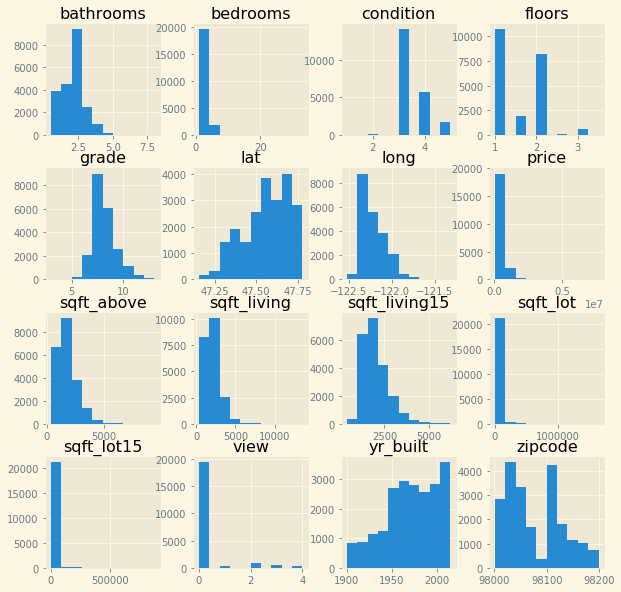

In [133]:
df_clean.hist(figsize=(10,10));

These initial histograms tell me that condition, floors, and view are for sure categorical. Now for the scatterplots.

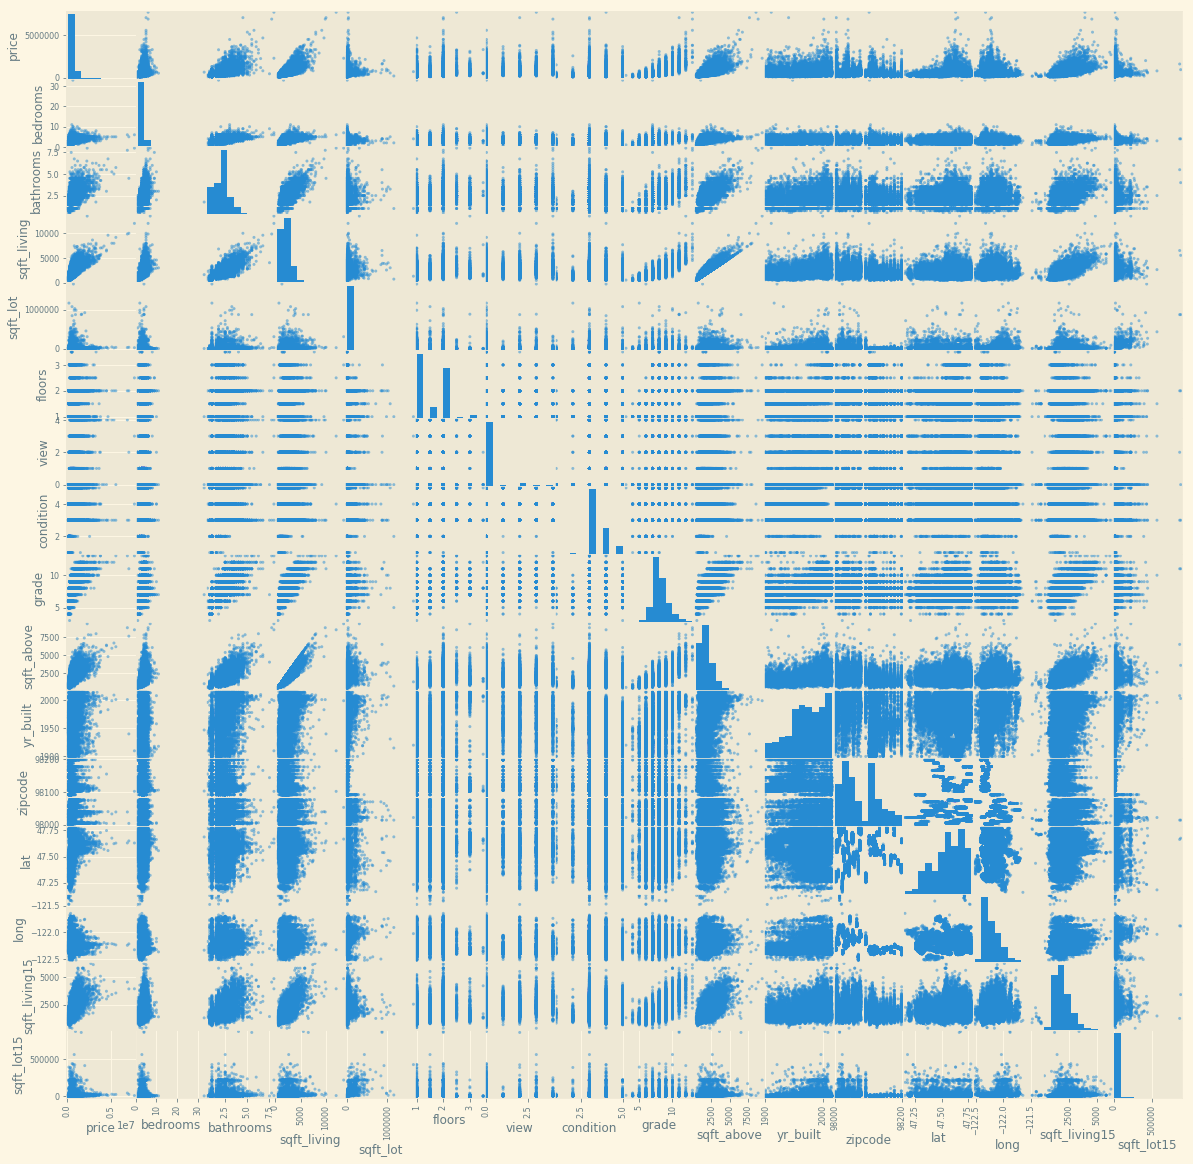

In [106]:
# scatter matrix to determine categorical data
pd.plotting.scatter_matrix(df_clean, figsize=(20,20));

Based on this information, floors, view, condition, grade, zipcode are definitately categorical variables. I would like to look at some of the other variables more closely, like the years and bedroom and bathrooms. It also looks like bedrooms has an outlier.

I should note that waterfront and yr_renovated are excluded from this matrix due to the data type being an object.

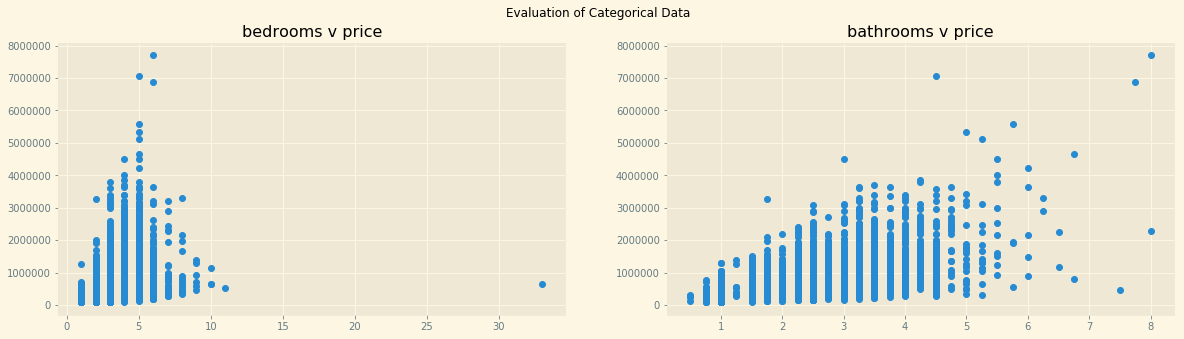

In [134]:
fig01 = plt.figure(figsize=(20,5))
fig01.suptitle('Evaluation of Categorical Data')
ax = fig01.add_subplot(121)
ax1 = ax.scatter(x=df_clean['bedrooms'], y=df_clean['price'])
ax1.axes.set_title('bedrooms v price')
ax = fig01.add_subplot(122)
ax2 = ax.scatter(x=df_clean['bathrooms'], y=df_clean['price'])
ax2.axes.set_title('bathrooms v price');

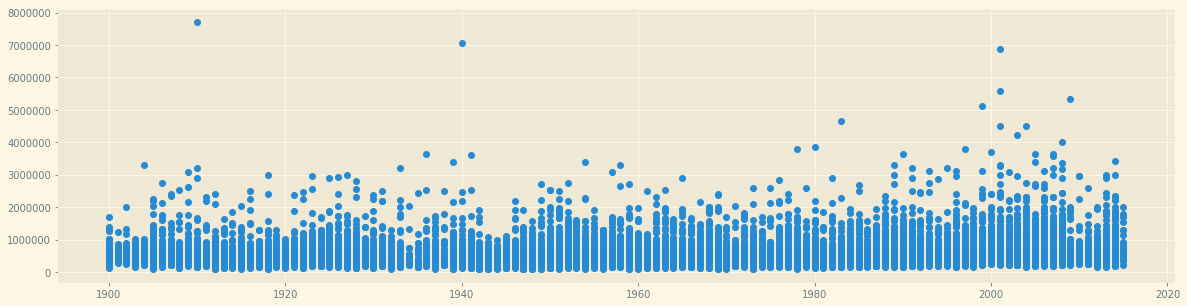

In [135]:
plt.figure(figsize=(20,5));
plt.scatter(x=df_clean['yr_built'], y=df_clean['price']);

This scatterplot shows that year is also a categorical value.

### Categorical and Continuous data seperation

In [11]:
categorical = df_clean.loc[:,['zipcode', 'yr_built','bedrooms', 'bathrooms', 'floors', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade']]
# categorical.head()
continuous = df_clean.loc[:, ['lat', 'long', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'date', 'sqft_living15', 'sqft_lot15']]
# continuous.head()
target = pd.DataFrame(df_clean.loc[:, 'price'])
# target.head()

### Back to correcting data types

#### Categorical data

In [137]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
zipcode         21534 non-null int64
yr_built        21534 non-null int64
bedrooms        21534 non-null int64
bathrooms       21534 non-null float64
floors          21534 non-null float64
waterfront      21534 non-null object
yr_renovated    21534 non-null object
view            21534 non-null float64
condition       21534 non-null int64
grade           21534 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.8+ MB


But what does the data look like in each of these cells?

In [138]:
print(categorical.zipcode.unique())
print(categorical.yr_built.unique())
print(categorical.bedrooms.unique())
print(categorical.bathrooms.unique())
print(categorical.floors.unique())
print(categorical.waterfront.unique())
print(categorical.yr_renovated.unique())
print(categorical.view.unique())
print(categorical.condition.unique())
print(categorical.grade.unique())

[98178 98125 98028 98136 98074 98053 98003 98146 98038 98007 98115 98107
 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052 98027
 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008 98059
 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032 98045
 98102 98077 98198 98108 98168 98177 98029 98006 98109 98022 98033 98155
 98024 98011 98031 98106 98072 98188 98065 98014 98055 98039]
[1955 1951 1933 1965 1987 2001 1995 1960 2003 1942 1927 1977 1900 1979
 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929 1981
 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991 1954
 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988 1962
 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924 1990
 1914 1926 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943 1957 2004
 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1963 1998 1913 2013
 1907 1958 2012 1912 2011 1932 1944 1902 2009 1903 1970 2015 1934 1938
 1919

Last time, I tried to fix each output prior to categorizing each column of data. This time, I will categorize first.

In [154]:
# generating categories for each type of categorical data
zipcode = categorical['zipcode'].astype('category')
yr_built = categorical['yr_built'].astype('category')
bedrooms = categorical['bedrooms'].astype('category')
bathrooms = categorical['bathrooms'].astype('category')
floors = categorical['floors'].astype('category')
waterfront = categorical['waterfront'].astype('category')
yr_renovated = categorical['yr_renovated'].astype('category')
view = categorical['view'].astype('category')
condition = categorical['condition'].astype('category')
grade = categorical['grade'].astype('category')
bathrooms

id
7129300520    1.00
6414100192    2.25
5631500400    1.00
2487200875    3.00
1954400510    2.00
7237550310    4.50
1321400060    2.25
2414600126    1.00
3793500160    2.50
1736800520    2.50
9212900260    1.00
114101516     1.00
6054650070    1.75
1175000570    2.00
9297300055    3.00
1875500060    2.00
6865200140    1.00
16000397      1.00
7983200060    1.00
6300500875    1.75
2524049179    2.75
7137970340    2.50
8091400200    1.50
3814700200    2.25
1202000200    2.00
1794500383    1.75
3303700376    1.00
5101402488    1.75
1873100390    2.50
8562750320    2.50
              ... 
3052700432    2.25
2025049203    1.00
952006823     2.50
3832050760    2.50
2767604724    2.50
6632300207    2.50
2767600688    1.50
7570050450    2.50
7430200100    3.50
4140940150    2.75
1931300412    2.25
8672200110    3.75
5087900040    2.75
1972201967    2.25
7502800100    2.75
191100405     3.25
8956200760    2.50
7202300110    3.00
249000205     3.75
5100403806    2.50
844000965     1.75
785214004

It looks like in the categorization process that the data outputs fixed themselves, as in for bathrooms, what previously appeared at '3.' now appears as '3.00'.

In [140]:
# confirmed dtype change to categories
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
zipcode         21534 non-null int64
yr_built        21534 non-null int64
bedrooms        21534 non-null int64
bathrooms       21534 non-null float64
floors          21534 non-null float64
waterfront      21534 non-null object
yr_renovated    21534 non-null object
view            21534 non-null float64
condition       21534 non-null int64
grade           21534 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.8+ MB


Let's be sure to replace the old data with the new.

In [12]:
categorical['zipcode'] = categorical['zipcode'].astype('category')
categorical['yr_built'] = categorical['yr_built'].astype('category')
categorical['bedrooms'] = categorical['bedrooms'].astype('category')
categorical['bathrooms'] = categorical['bathrooms'].astype('category')
categorical['floors'] = categorical['floors'].astype('category')
categorical['waterfront'] = categorical['waterfront'].astype('category')
categorical['yr_renovated'] = categorical['yr_renovated'].astype('category')
categorical['view'] = categorical['view'].astype('category')
categorical['condition'] = categorical['condition'].astype('category')
categorical['grade'] = categorical['grade'].astype('category')
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
zipcode         21534 non-null category
yr_built        21534 non-null category
bedrooms        21534 non-null category
bathrooms       21534 non-null category
floors          21534 non-null category
waterfront      21534 non-null category
yr_renovated    21534 non-null category
view            21534 non-null category
condition       21534 non-null category
grade           21534 non-null category
dtypes: category(10)
memory usage: 393.5 KB


#### Continuous data

In [142]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
lat              21534 non-null float64
long             21534 non-null float64
sqft_lot         21534 non-null int64
sqft_living      21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
date             21534 non-null object
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.6+ MB


I wonder why sqft_basement and data are objects?

In [143]:
# basement preview
continuous.sqft_basement

id
7129300520       0.0
6414100192     400.0
5631500400       0.0
2487200875     910.0
1954400510       0.0
7237550310    1530.0
1321400060         ?
2414600126     730.0
3793500160       0.0
1736800520    1700.0
9212900260     300.0
114101516        0.0
6054650070       0.0
1175000570       0.0
9297300055     970.0
1875500060       0.0
6865200140       0.0
16000397           ?
7983200060       0.0
6300500875     760.0
2524049179     720.0
7137970340       0.0
8091400200       0.0
3814700200       0.0
1202000200       0.0
1794500383     700.0
3303700376       0.0
5101402488     730.0
1873100390       0.0
8562750320       0.0
               ...  
3052700432     280.0
2025049203       0.0
952006823      320.0
3832050760       0.0
2767604724       0.0
6632300207       0.0
2767600688     190.0
7570050450       0.0
7430200100    1800.0
4140940150       0.0
1931300412       0.0
8672200110       0.0
5087900040       0.0
1972201967      50.0
7502800100       0.0
191100405          ?
8956200760

There's a '?' in the data set. We'll have to change that to a number. Maybe the mean or the mode?

In [13]:
weird_basement = continuous.loc[continuous['sqft_basement'] == '?']
print(len(weird_basement))
print(continuous.sqft_basement.mode())

452
0    0.0
dtype: object


Since the mode, is 0, I'll replace the ? with zeros in the sqft_basement data. I couldn't find the mean without transforming the data. Will check on later when trying to optimize the model, if basement data is included.

In [14]:
continuous.loc[continuous['sqft_basement'] == '?', 'sqft_basement'] = 0
continuous.sqft_basement.value_counts()

0.0       12798
0           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
850.0        71
          ...  
588.0         1
666.0         1
1816.0        1
1024.0        1
2050.0        1
1852.0        1
1008.0        1
2400.0        1
2350.0        1
2580.0        1
3480.0        1
1548.0        1
1798.0        1
1960.0        1
3500.0        1
283.0         1
415.0         1
508.0         1
3000.0        1
2720.0        1
652.0         1
906.0         1
875.0         1
176.0         1
1920.0        1
266.0         1
172.0         1
2730.0        1
1284.0        1
516.0         1
Name: sqft_basement, Len

Since the zeros haven't combined yet, I'll need to ensure that this column of data is set to an interger value.

In [15]:
continuous.sqft_basement = continuous.sqft_basement.astype(float)
continuous.sqft_basement.value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
910.0        71
850.0        71
          ...  
2600.0        1
1008.0        1
1281.0        1
274.0         1
417.0         1
2850.0        1
415.0         1
2240.0        1
243.0         1
143.0         1
1525.0        1
862.0         1
172.0         1
225.0         1
2490.0        1
935.0         1
3000.0        1
2500.0        1
1990.0        1
1840.0        1
1548.0        1
518.0         1
915.0         1
266.0         1
1930.0        1
588.0         1
1920.0        1
602.0         1
1245.0        1
1135.0        1
Name: sqft_basement, Len

Since the sqft_basement data type is pretty evenly divided between 0 and not zero, it might be useful to change this over to a categorical data type.

In [16]:
# change sqft_basement over into a categorical type
continuous.loc[continuous['sqft_basement'] != 0, 'sqft_basement'] = 1
# continuous.sqft_basement.value_counts()
basement = continuous['sqft_basement'].astype(str)
# print(len(basement))
# print(len(categorical))

# add basement to categorical data
categorical = pd.concat([categorical, basement], axis=1)
categorical['sqft_basement'] = categorical['sqft_basement'].astype('category')
# categorical.head()
# categorical.info()

# remove sqft_basement from continuous data
continuous = continuous.drop(labels='sqft_basement', axis=1)
# continuous.head()

In [17]:
# data preview
continuous.date

id
7129300520    10/13/2014
6414100192     12/9/2014
5631500400     2/25/2015
2487200875     12/9/2014
1954400510     2/18/2015
7237550310     5/12/2014
1321400060     6/27/2014
2414600126     4/15/2015
3793500160     3/12/2015
1736800520      4/3/2015
9212900260     5/27/2014
114101516      5/28/2014
6054650070     10/7/2014
1175000570     3/12/2015
9297300055     1/24/2015
1875500060     7/31/2014
6865200140     5/29/2014
16000397       12/5/2014
7983200060     4/24/2015
6300500875     5/14/2014
2524049179     8/26/2014
7137970340      7/3/2014
8091400200     5/16/2014
3814700200    11/20/2014
1202000200     11/3/2014
1794500383     6/26/2014
3303700376     12/1/2014
5101402488     6/24/2014
1873100390      3/2/2015
8562750320    11/10/2014
                 ...    
3052700432    11/12/2014
2025049203     6/10/2014
952006823      12/2/2014
3832050760     8/28/2014
2767604724    10/15/2014
6632300207      3/5/2015
2767600688    11/13/2014
7570050450     9/10/2014
7430200100     5/14/20

For the date, the slashes make the data a string, hence object. We'll need to change this column's data todate.

In [19]:
# date to datatype todate
pd.to_datetime(continuous.date).head()
continuous.date = pd.to_datetime(continuous.date)
continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
lat              21534 non-null float64
long             21534 non-null float64
sqft_lot         21534 non-null int64
sqft_living      21534 non-null int64
sqft_above       21534 non-null int64
date             21534 non-null datetime64[ns]
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 1.5 MB


#### Target data

In [22]:
print(target.describe())
print(target.info())

              price
count  2.153400e+04
mean   5.400577e+05
std    3.660596e+05
min    7.800000e+04
25%    3.220000e+05
50%    4.500000e+05
75%    6.450000e+05
max    7.700000e+06
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 1 columns):
price    21534 non-null float64
dtypes: float64(1)
memory usage: 336.5 KB
None


Now that all data is processed and cleaned, let's put it all together and begin to explore.

#### Join categorical, continuous, and target data together in one dataframe.

In [43]:
all_data = [continuous, categorical, target]
kc_housing = pd.concat(all_data, axis=1)
kc_housing.head()

,lat,long,sqft_lot,sqft_living,sqft_above,date,sqft_living15,sqft_lot15,zipcode,yr_built,bedrooms,bathrooms,floors,waterfront,yr_renovated,view,condition,grade,sqft_basement,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,47.5112,-122.257,5650,1180,1180,2014-10-13,1340,5650,98178,1955,3,1.00,1.0,unknown,0,0.0,3,7,0.0,221900.0
6414100192,47.7210,-122.319,7242,2570,2170,2014-12-09,1690,7639,98125,1951,3,2.25,2.0,0,1991,0.0,3,7,1.0,538000.0
5631500400,47.7379,-122.233,10000,770,770,2015-02-25,2720,8062,98028,1933,2,1.00,1.0,0,unknown,0.0,3,6,0.0,180000.0
2487200875,47.5208,-122.393,5000,1960,1050,2014-12-09,1360,5000,98136,1965,4,3.00,1.0,0,0,0.0,5,7,1.0,604000.0
1954400510,47.6168,-122.045,8080,1680,1680,2015-02-18,1800,7503,98074,1987,3,2.00,1.0,0,0,0.0,3,8,0.0,510000.0


### Explore Data

In [44]:
kc_housing.describe()

,lat,long,sqft_lot,sqft_living,sqft_above,sqft_living15,sqft_lot15,price
count,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04
mean,47.560180,-122.213948,1.509060e+04,2079.827854,1788.557537,1986.299944,12751.079502,5.400577e+05
std,0.138528,0.140735,4.138021e+04,917.446520,827.745641,685.121001,27255.483308,3.660596e+05
min,47.155900,-122.519000,5.200000e+02,370.000000,370.000000,399.000000,651.000000,7.800000e+04
25%,47.471200,-122.328000,5.040000e+03,1430.000000,1190.000000,1490.000000,5100.000000,3.220000e+05
50%,47.571900,-122.230000,7.617000e+03,1910.000000,1560.000000,1840.000000,7620.000000,4.500000e+05
75%,47.678100,-122.125000,1.068775e+04,2550.000000,2210.000000,2360.000000,10083.000000,6.450000e+05
max,47.777600,-121.315000,1.651359e+06,13540.000000,9410.000000,6210.000000,871200.000000,7.700000e+06


In [ ]:
# histograms
# normality assumptions (linear, normal, heterskedacity)
# heat maps
# correleations
# decisions

## Find Outliers

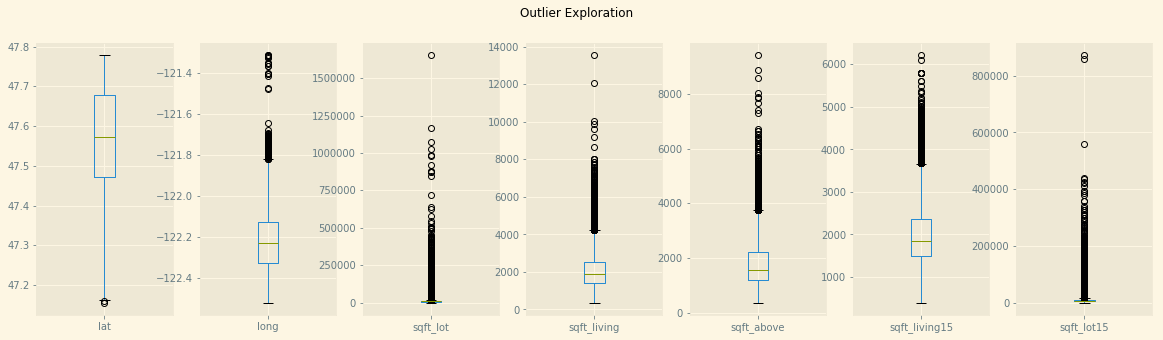

In [45]:
fig02 = plt.figure(figsize=(20,5))
fig02.suptitle('Outlier Exploration')


ax = fig02.add_subplot(171)
ax1 = kc_housing.lat.plot(kind='box')
ax = fig02.add_subplot(172)
ax2 = kc_housing.long.plot(kind='box')
ax = fig02.add_subplot(173)
ax3 = kc_housing.sqft_lot.plot(kind='box')
ax = fig02.add_subplot(174)
ax4 = kc_housing.sqft_living.plot(kind='box')
ax = fig02.add_subplot(175)
ax5 = kc_housing.sqft_above.plot(kind='box')
ax = fig02.add_subplot(176)
ax6 = kc_housing.sqft_living15.plot(kind='box')
ax = fig02.add_subplot(177)
ax7= kc_housing.sqft_lot15.plot(kind='box')

Since both of the lot sizes have so many outliers, let's eliminate all sqft_lot > 17500. Then we'll rerun this outlier exploration.

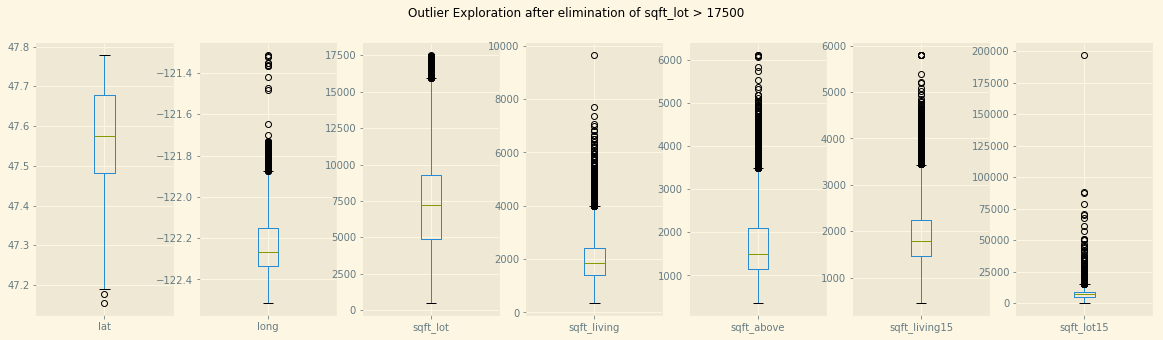

In [63]:
# eliminate all sqft_lot > 17500
kc_housing_clean = kc_housing.loc[kc_housing['sqft_lot'] < 17500]
# len(kc_housing_clean)
fig03 = plt.figure(figsize=(20,5))
fig03.suptitle('Outlier Exploration after elimination of sqft_lot > 17500')


ax = fig03.add_subplot(171)
ax1 = kc_housing_clean.lat.plot(kind='box')
ax = fig03.add_subplot(172)
ax2 = kc_housing_clean.long.plot(kind='box')
ax = fig03.add_subplot(173)
ax3 = kc_housing_clean.sqft_lot.plot(kind='box')
ax = fig03.add_subplot(174)
ax4 = kc_housing_clean.sqft_living.plot(kind='box')
ax = fig03.add_subplot(175)
ax5 = kc_housing_clean.sqft_above.plot(kind='box')
ax = fig03.add_subplot(176)
ax6 = kc_housing_clean.sqft_living15.plot(kind='box')
ax = fig03.add_subplot(177)
ax7= kc_housing_clean.sqft_lot15.plot(kind='box')

Let's do the same thing for sqft_lot15, and eliminate all nearest neighbors with more than 15000 square foot.

length of cleaner dataset: 18371


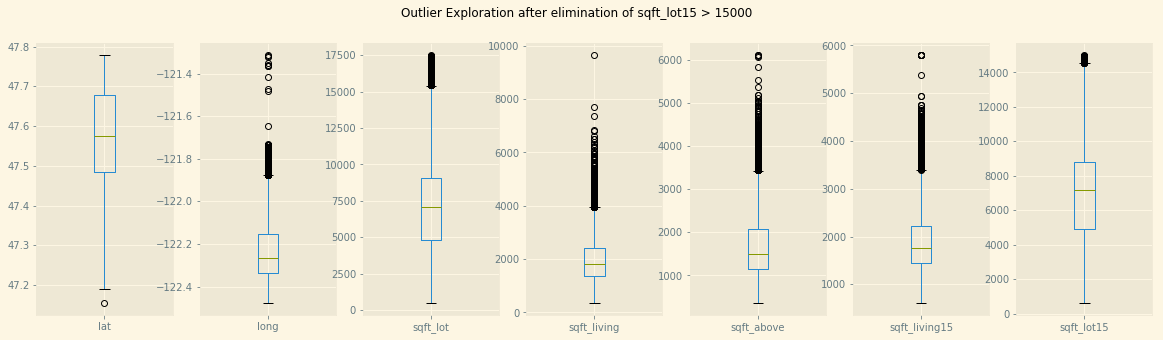

In [76]:
# eliminate all sqft_lot15 > 15000
kc_housing_sqft_lot = kc_housing.loc[kc_housing['sqft_lot'] < 17500]
kc_housing_sqft_lot15 = kc_housing_sqft_lot.loc[kc_housing_sqft_lot['sqft_lot15'] < 15000]
print('length of cleaner dataset: ' + str(len(kc_housing_sqft_lot15)))
fig04 = plt.figure(figsize=(20,5))
fig04.suptitle('Outlier Exploration after elimination of sqft_lot15 > 15000')


ax = fig04.add_subplot(171)
ax1 = kc_housing_sqft_lot15.lat.plot(kind='box')
ax = fig04.add_subplot(172)
ax2 = kc_housing_sqft_lot15.long.plot(kind='box')
ax = fig04.add_subplot(173)
ax3 = kc_housing_sqft_lot15.sqft_lot.plot(kind='box')
ax = fig04.add_subplot(174)
ax4 = kc_housing_sqft_lot15.sqft_living.plot(kind='box')
ax = fig04.add_subplot(175)
ax5 = kc_housing_sqft_lot15.sqft_above.plot(kind='box')
ax = fig04.add_subplot(176)
ax6 = kc_housing_sqft_lot15.sqft_living15.plot(kind='box')
ax = fig04.add_subplot(177)
ax7= kc_housing_sqft_lot15.sqft_lot15.plot(kind='box')

Next let's eliminate some of the outliers from sqft_living and sqft_living15.

length of cleaner dataset: 17999


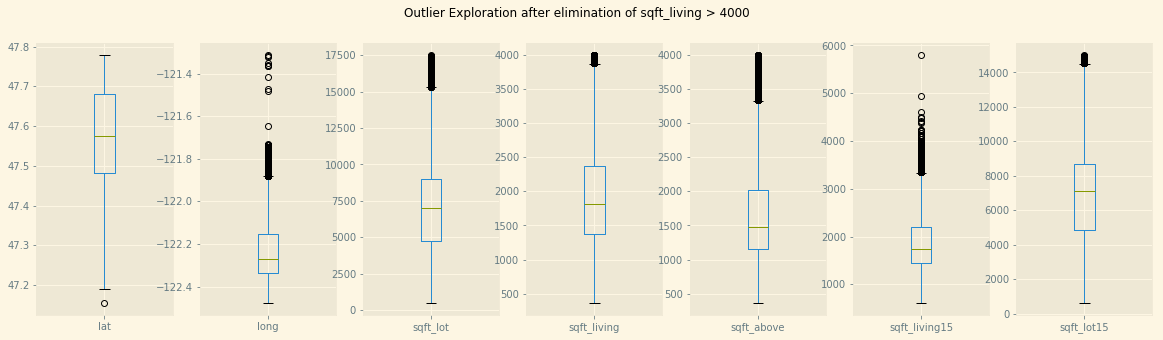

In [77]:
# eliminate all sqft_living > 4000
kc_housing_sqft_lot = kc_housing.loc[kc_housing['sqft_lot'] < 17500]
kc_housing_sqft_lot15 = kc_housing_sqft_lot.loc[kc_housing_sqft_lot['sqft_lot15'] < 15000]
kc_housing_sqft_living = kc_housing_sqft_lot15.loc[kc_housing_sqft_lot15['sqft_living'] < 4000]
print('length of cleaner dataset: ' + str(len(kc_housing_sqft_living)))
fig05 = plt.figure(figsize=(20,5))
fig05.suptitle('Outlier Exploration after elimination of sqft_living > 4000')


ax = fig05.add_subplot(171)
ax1 = kc_housing_sqft_living.lat.plot(kind='box')
ax = fig05.add_subplot(172)
ax2 = kc_housing_sqft_living.long.plot(kind='box')
ax = fig05.add_subplot(173)
ax3 = kc_housing_sqft_living.sqft_lot.plot(kind='box')
ax = fig05.add_subplot(174)
ax4 = kc_housing_sqft_living.sqft_living.plot(kind='box')
ax = fig05.add_subplot(175)
ax5 = kc_housing_sqft_living.sqft_above.plot(kind='box')
ax = fig05.add_subplot(176)
ax6 = kc_housing_sqft_living.sqft_living15.plot(kind='box')
ax = fig05.add_subplot(177)
ax7= kc_housing_sqft_living.sqft_lot15.plot(kind='box')

Let's do the same for sqft_living15, eliminate all values > 4000.

length of cleaner dataset: 17976


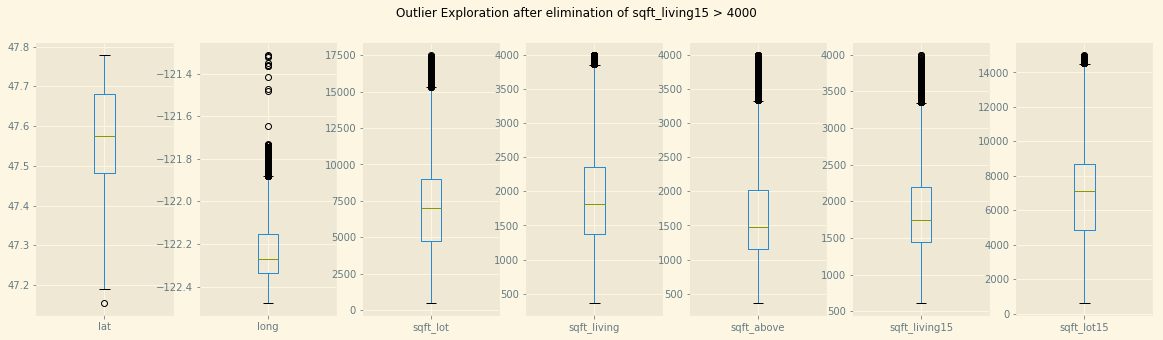

In [78]:
# eliminate all sqft_living15 > 4000
kc_housing_sqft_lot = kc_housing.loc[kc_housing['sqft_lot'] < 17500]
kc_housing_sqft_lot15 = kc_housing_sqft_lot.loc[kc_housing_sqft_lot['sqft_lot15'] < 15000]
kc_housing_sqft_living = kc_housing_sqft_lot15.loc[kc_housing_sqft_lot15['sqft_living'] < 4000]
kc_housing_sqft_living15 = kc_housing_sqft_living.loc[kc_housing_sqft_living['sqft_living15'] < 4000]
print('length of cleaner dataset: ' + str(len(kc_housing_sqft_living15)))
fig06 = plt.figure(figsize=(20,5))
fig06.suptitle('Outlier Exploration after elimination of sqft_living15 > 4000')


ax = fig06.add_subplot(171)
ax1 = kc_housing_sqft_living15.lat.plot(kind='box')
ax = fig06.add_subplot(172)
ax2 = kc_housing_sqft_living15.long.plot(kind='box')
ax = fig06.add_subplot(173)
ax3 = kc_housing_sqft_living15.sqft_lot.plot(kind='box')
ax = fig06.add_subplot(174)
ax4 = kc_housing_sqft_living15.sqft_living.plot(kind='box')
ax = fig06.add_subplot(175)
ax5 = kc_housing_sqft_living15.sqft_above.plot(kind='box')
ax = fig06.add_subplot(176)
ax6 = kc_housing_sqft_living15.sqft_living15.plot(kind='box')
ax = fig06.add_subplot(177)
ax7= kc_housing_sqft_living15.sqft_lot15.plot(kind='box')

Let's do the same thing for sqft_above, let's eliminate all data > 3500

length of cleaner dataset: 17731


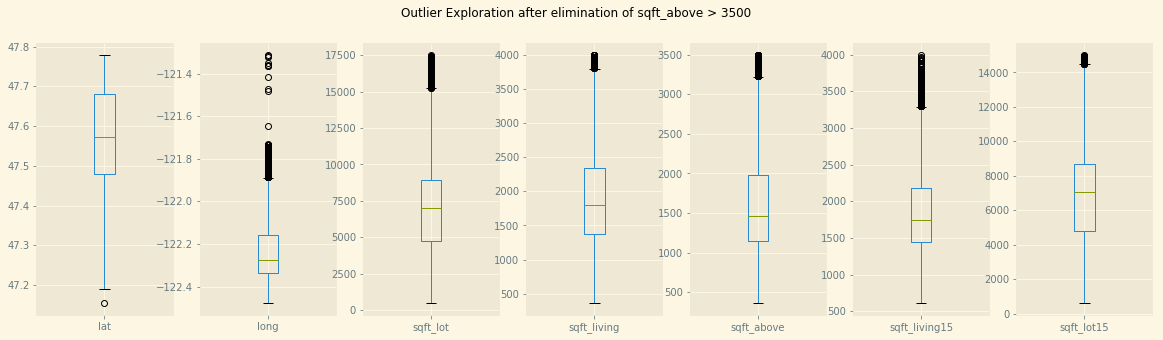

In [131]:
# eliminate all sqft_above > 3500
kc_housing_sqft_lot = kc_housing.loc[kc_housing['sqft_lot'] < 17500]
kc_housing_sqft_lot15 = kc_housing_sqft_lot.loc[kc_housing_sqft_lot['sqft_lot15'] < 15000]
kc_housing_sqft_living = kc_housing_sqft_lot15.loc[kc_housing_sqft_lot15['sqft_living'] < 4000]
kc_housing_sqft_living15 = kc_housing_sqft_living.loc[kc_housing_sqft_living['sqft_living15'] < 4000]
kc_housing_sqft_above = kc_housing_sqft_living15.loc[kc_housing_sqft_living15['sqft_above'] < 3500]
print('length of cleaner dataset: ' + str(len(kc_housing_sqft_above)))
fig07 = plt.figure(figsize=(20,5))
fig07.suptitle('Outlier Exploration after elimination of sqft_above > 3500')


ax = fig07.add_subplot(171)
ax1 = kc_housing_sqft_above.lat.plot(kind='box')
ax = fig07.add_subplot(172)
ax2 = kc_housing_sqft_above.long.plot(kind='box')
ax = fig07.add_subplot(173)
ax3 = kc_housing_sqft_above.sqft_lot.plot(kind='box')
ax = fig07.add_subplot(174)
ax4 = kc_housing_sqft_above.sqft_living.plot(kind='box')
ax = fig07.add_subplot(175)
ax5 = kc_housing_sqft_above.sqft_above.plot(kind='box')
ax = fig07.add_subplot(176)
ax6 = kc_housing_sqft_above.sqft_living15.plot(kind='box')
ax = fig07.add_subplot(177)
ax7= kc_housing_sqft_above.sqft_lot15.plot(kind='box')

Let's take a look at our categorical data as well.

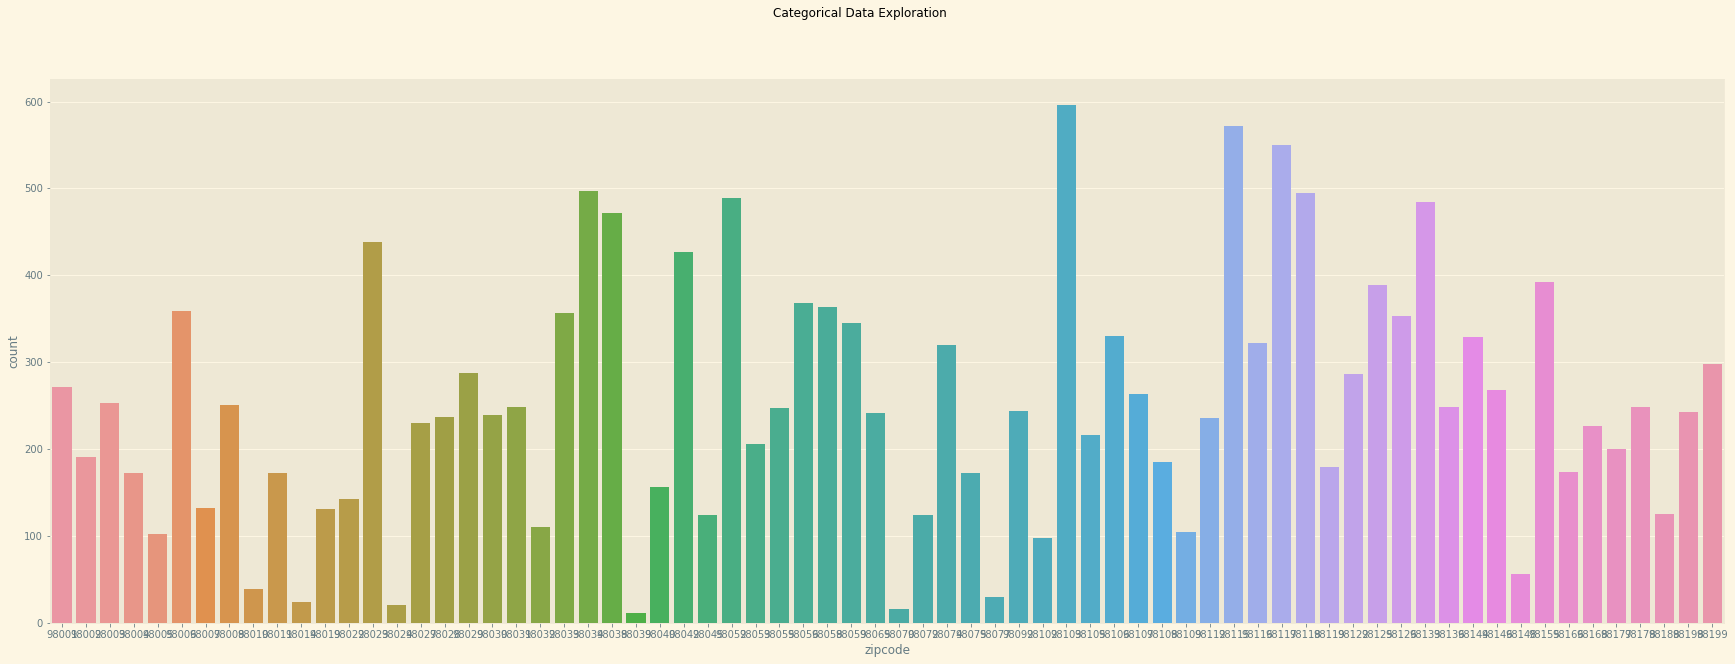

In [84]:
# box graphs for categorical data
import seaborn as sns

fig08 = plt.figure(figsize=(30,10))
fig08.suptitle('Categorical Data Exploration')

ax = fig08.add_subplot(111)
ax1 = sns.countplot(kc_housing_sqft_above['zipcode'])

In [88]:
kc_housing_sqft_above['zipcode'].value_counts()

98103    596
98115    572
98117    550
98034    497
98118    495
98052    489
98133    485
98038    472
98023    438
98042    427
98155    392
98125    389
98056    368
98058    364
98006    359
98033    357
98126    353
98059    345
98106    330
98144    329
98116    322
98074    320
98199    298
98029    288
98122    286
98001    271
98146    268
98107    263
98003    253
98008    251
        ... 
98027    230
98168    226
98105    216
98053    206
98177    200
98002    191
98108    185
98119    179
98166    174
98004    173
98075    173
98011    172
98040    156
98022    143
98007    132
98019    131
98188    125
98045    124
98072    124
98032    110
98109    104
98005    102
98102     98
98148     56
98010     39
98077     30
98014     24
98024     20
98070     16
98039     11
Name: zipcode, Length: 70, dtype: int64

In [137]:
# remove low zipcode counts
low_zipcode_count = ['98014', '98024', '98070', '98039']
# print(kc_housing_sqft_above.head())
kc_housing_zipcode = kc_housing_sqft_above.reset_index().set_index('zipcode')
kc_housing_zipcode = kc_housing_zipcode.drop(labels=98014, axis=0)
# print(kc_housing_zipcode.index.unique())
kc_housing_zipcode = kc_housing_zipcode.drop(labels=98024, axis=0)
# print(kc_housing_zipcode.index.unique())
kc_housing_zipcode = kc_housing_zipcode.drop(labels=98070, axis=0)
# print(kc_housing_zipcode.index.unique())
kc_housing_zipcode = kc_housing_zipcode.drop(labels=98039, axis=0)
# print(kc_housing_zipcode.index.unique())
kc_housing_zipcode = kc_housing_zipcode.reset_index().set_index('id')
# kc_housing_zipcode.head()
kc_housing_zipcode.zipcode.value_counts()
# kc_housing_zipcode.isna().sum()
# print(len(kc_housing_zipcode))

# fig09 = plt.figure(figsize=(30,10))
# fig09.suptitle('Categorical Data Exploration with statistically insignifcant zipcodes removed')

# ax = fig09.add_subplot(111)
# ax1 = sns.countplot(kc_housing_zipcode['zipcode'])
# fig09.savefig('Categorical Data Exploration with statistically insignifcant zipcodes removed.png', bbox_inches='tight')

98103    596
98115    572
98117    550
98034    497
98118    495
98052    489
98133    485
98038    472
98023    438
98042    427
98155    392
98125    389
98056    368
98058    364
98006    359
98033    357
98126    353
98059    345
98106    330
98144    329
98116    322
98074    320
98199    298
98029    288
98122    286
98001    271
98146    268
98107    263
98003    253
98008    251
        ... 
98027    230
98168    226
98105    216
98053    206
98177    200
98002    191
98108    185
98119    179
98166    174
98004    173
98075    173
98011    172
98040    156
98022    143
98007    132
98019    131
98188    125
98045    124
98072    124
98032    110
98109    104
98005    102
98102     98
98148     56
98010     39
98077     30
98014      0
98024      0
98039      0
98070      0
Name: zipcode, Length: 70, dtype: int64

## Modeling

In [ ]:
# split into train and learn data sets
# multiple linear regression

## Interpret Model

## Evaluation of Model

In [ ]:
# use test data set here

## Deployment of Model